In [90]:
#import operational libraries
import pandas as pd
import numpy as np

#import data viz package
import matplotlib.pyplot as plt
import seaborn as sns

#import data modelling package
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#import metrics and helpful function
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import pickle

In [3]:
#change directory of where to load dataset
import os
os.chdir('C:/Users/PC/Documents')

In [4]:
#load dataset into a dataframe
df = pd.read_csv("telcom_data.csv")

In [5]:
#view first 10 rows of the dataframe
df.head(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,has_streaming
0,7590-VHVEG,Female,False,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No,No
1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No,No
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes,No
3,7795-CFOCW,Male,False,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No,No
4,9237-HQITU,Female,False,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes,No
5,9305-CDSKC,Female,False,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.500000,Yes,Yes
6,1452-KIOVK,Male,False,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No,Yes
7,6713-OKOMC,Female,False,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.750000,301.899994,No,No
8,7892-POOKP,Female,False,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.050049,Yes,Yes
9,6388-TABGU,Male,False,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.150002,3487.949951,No,No


In [6]:
#Gathering basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   bool   
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [7]:
#Gathering descriptive statistics about the data
df.describe()

,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771363
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,401.449997
50%,29.000000,70.349998,1397.475036
75%,55.000000,89.849998,3794.737488
max,72.000000,118.750000,8684.799805


In [8]:
#checking for missing values
df.isnull().sum()

customer_id           0
gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
has_streaming         0
dtype: int64

In [9]:
#view missing values 
df[df['total_charges'].isnull()]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,has_streaming
488,4472-LVYGI,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No,Yes
753,3115-CZMZD,Male,False,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,NaN,No,No
936,5709-LVOEQ,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No,Yes
1082,4367-NUYAO,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,NaN,No,No
1340,1371-DWPAZ,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No,Yes
3331,7644-OMVMY,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,NaN,No,No
3826,3213-VVOLG,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350000,NaN,No,No
4380,2520-SGTTA,Female,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,NaN,No,No
5218,2923-ARZLG,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700001,NaN,No,No
6670,4075-WKNIU,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.349998,NaN,No,Yes


In [10]:
#drop missing values in the total charge variable
df = df.dropna(subset=['total_charges'])

In [11]:
#confirming dropped missing values
df.isnull().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
has_streaming        0
dtype: int64

In [12]:
#checking for duplicates
df.duplicated().sum()

0

In [13]:
#checking the shape
df.shape

(7032, 22)

In [26]:
#drop the customer_id, churn, gender, and has_streaming colomn as it is irrelevant to the modelling
df = df.drop(columns=['customer_id', 'has_streaming'])

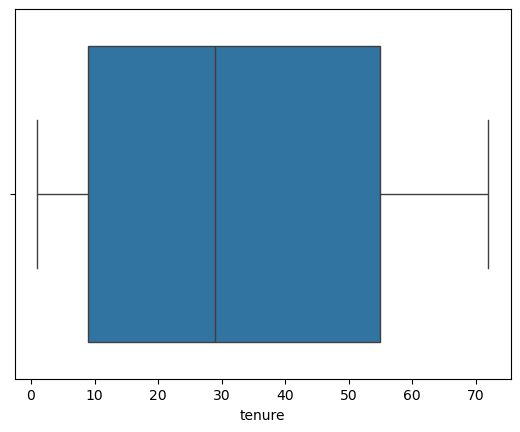

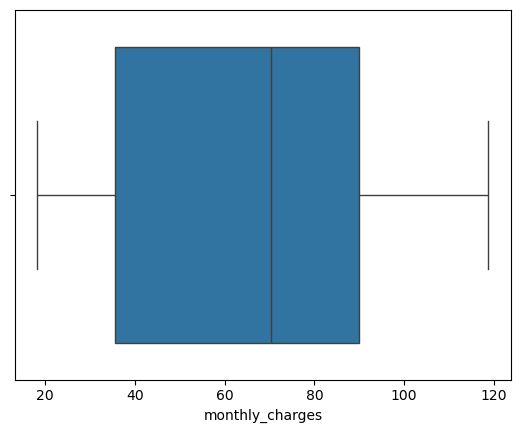

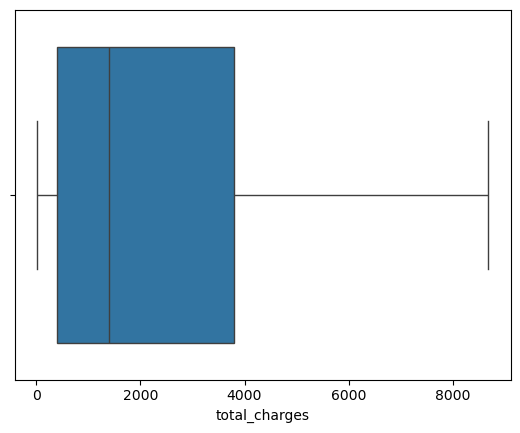

In [28]:
#Creating a boxplot to check the distribution of 'tenure', 'monthly_charges' and 'total_charges' and detect outliers
#Box plot
num_col = ['tenure','monthly_charges', 'total_charges']
for col in num_col:
    sns.boxplot(data = df, x = col)
    plt.show()

In [30]:
#checking the distribution of churn in the dataset
print(df['churn'].value_counts())

#getting the percentage of customers who churned vs non-churned
df['churn'].value_counts(normalize=True)

churn
No     5163
Yes    1869
Name: count, dtype: int64


churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

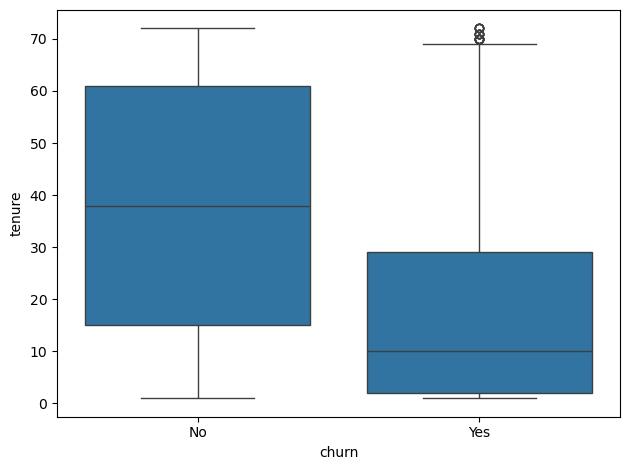

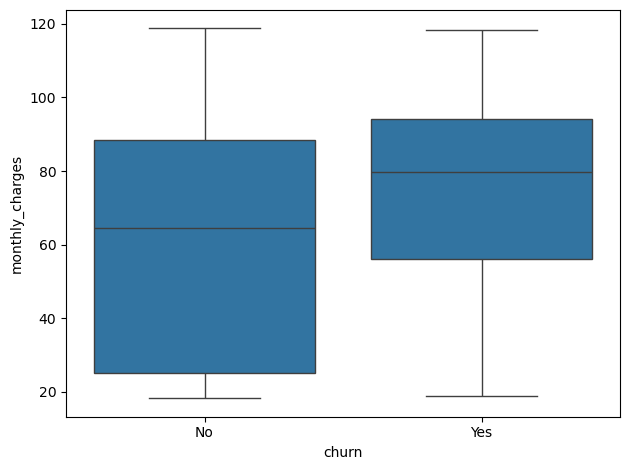

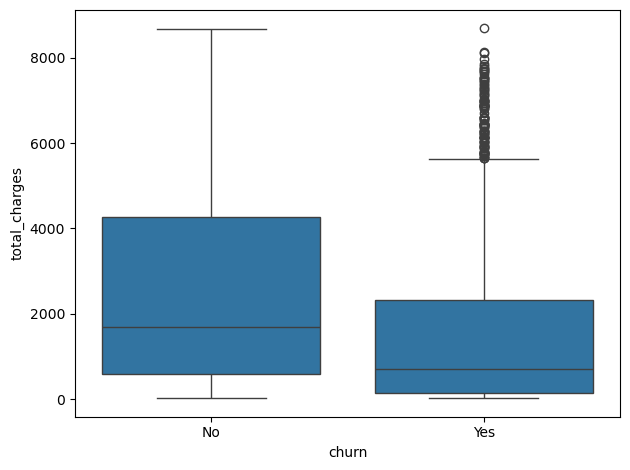

In [32]:
# creating a boxplot to check feature-churn relationship of numerical columns
for col in num_col:
    sns.boxplot(x='churn', y=col, data=df)
    plt.tight_layout()
    plt.show()


Churn Rate by gender:
   gender churn    percent
1  Female   Yes  26.959518
3    Male   Yes  26.204565


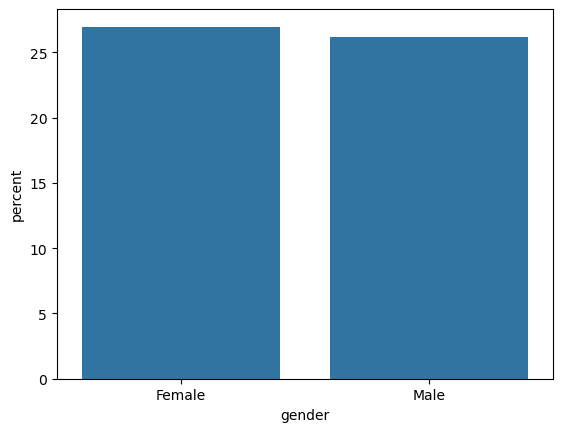


Churn Rate by senior_citizen:
   senior_citizen churn    percent
3            True   Yes  41.681261
1           False   Yes  23.650255


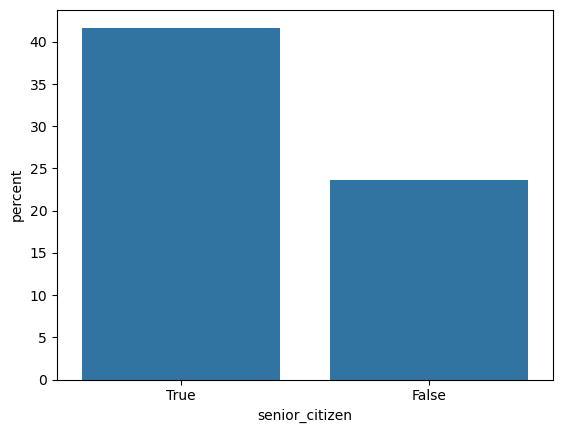


Churn Rate by partner:
      partner churn    percent
1  No           Yes  32.976092
3  Yes          Yes  19.717065


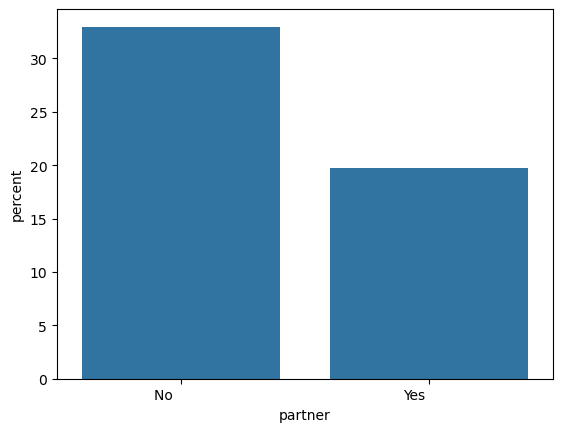


Churn Rate by dependents:
   dependents churn    percent
1  No           Yes  31.279140
3  Yes          Yes  15.531205


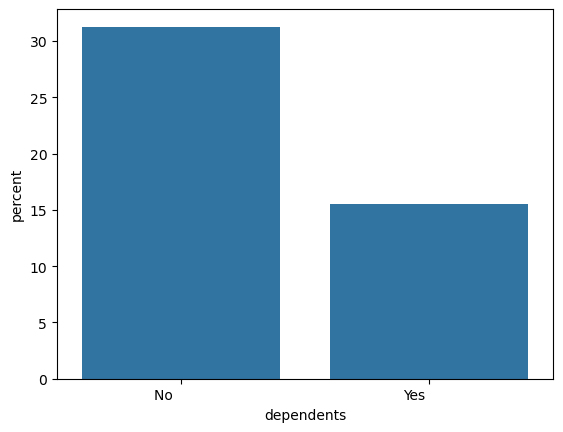


Churn Rate by phone_service:
  phone_service churn    percent
3           Yes   Yes  26.747481
1            No   Yes  25.000000


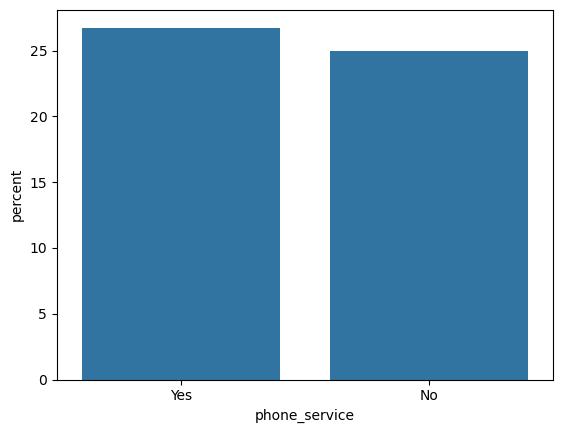


Churn Rate by multiple_lines:
     multiple_lines churn    percent
5               Yes   Yes  28.648466
1                No   Yes  25.081241
3  No phone service   Yes  25.000000


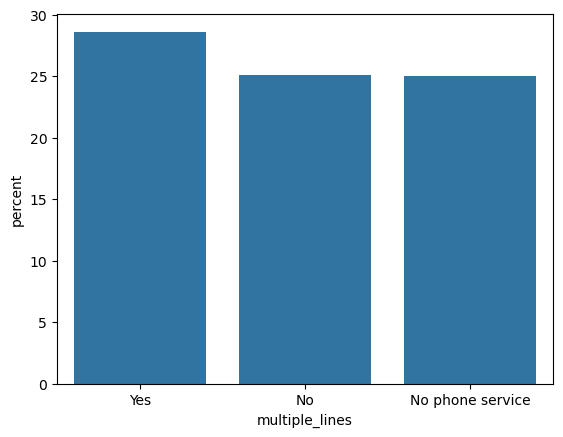


Churn Rate by internet_service:
  internet_service churn    percent
3      Fiber optic   Yes  41.892765
1              DSL   Yes  18.998344
5               No   Yes   7.434211


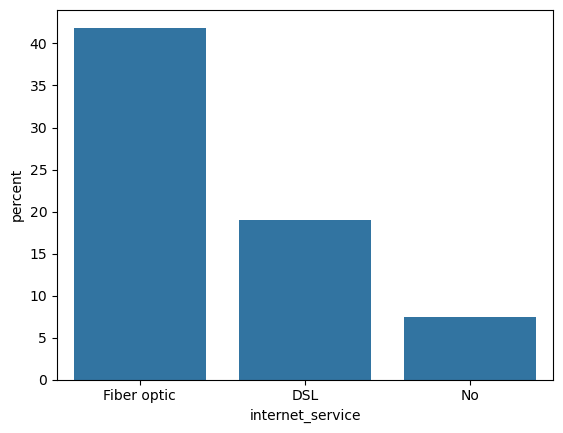


Churn Rate by online_security:
       online_security churn    percent
1                   No   Yes  41.778667
5                  Yes   Yes  14.640199
3  No internet service   Yes   7.434211


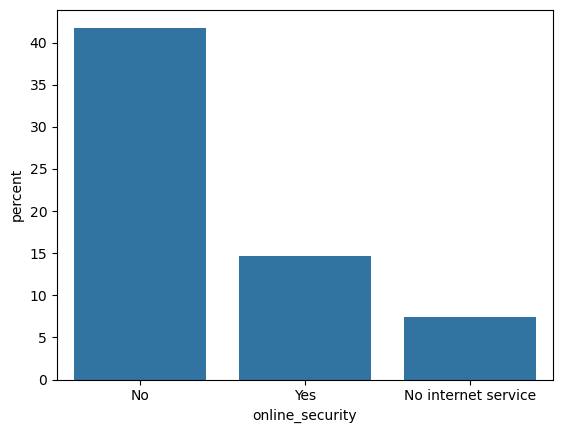


Churn Rate by online_backup:
         online_backup churn    percent
1                   No   Yes  39.941691
5                  Yes   Yes  21.567010
3  No internet service   Yes   7.434211


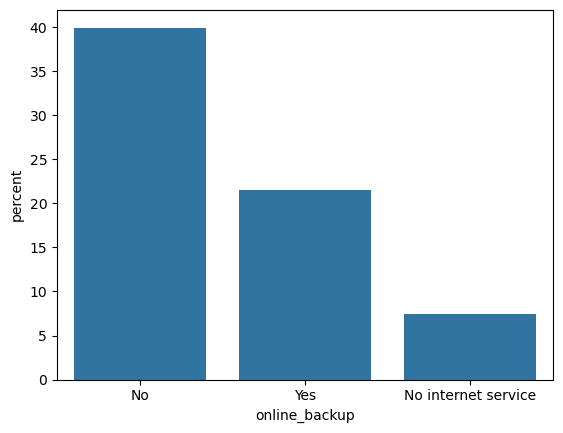


Churn Rate by device_protection:
     device_protection churn    percent
1                   No   Yes  39.140271
5                  Yes   Yes  22.539289
3  No internet service   Yes   7.434211


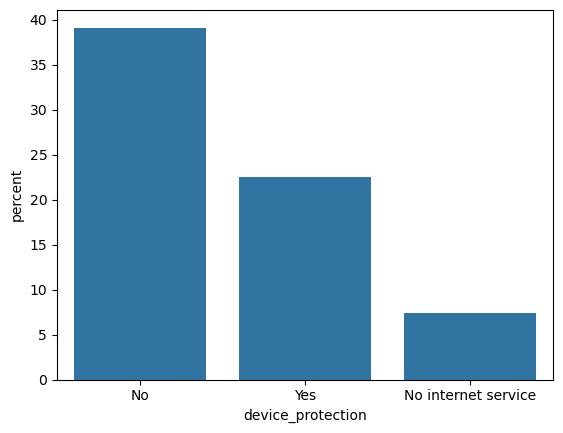


Churn Rate by tech_support:
          tech_support churn    percent
1                   No   Yes  41.647465
5                  Yes   Yes  15.196078
3  No internet service   Yes   7.434211


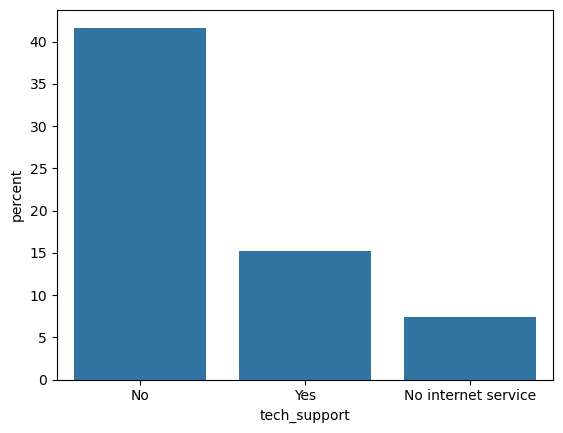


Churn Rate by streaming_tv:
          streaming_tv churn    percent
1                   No   Yes  33.535066
5                  Yes   Yes  30.114687
3  No internet service   Yes   7.434211


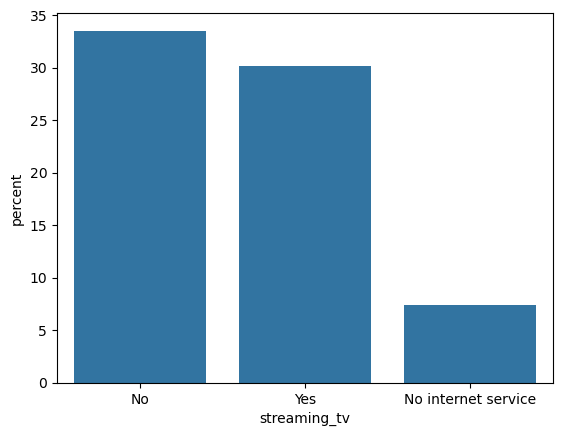


Churn Rate by streaming_movies:
      streaming_movies churn    percent
1                   No   Yes  33.728875
5                  Yes   Yes  29.952398
3  No internet service   Yes   7.434211


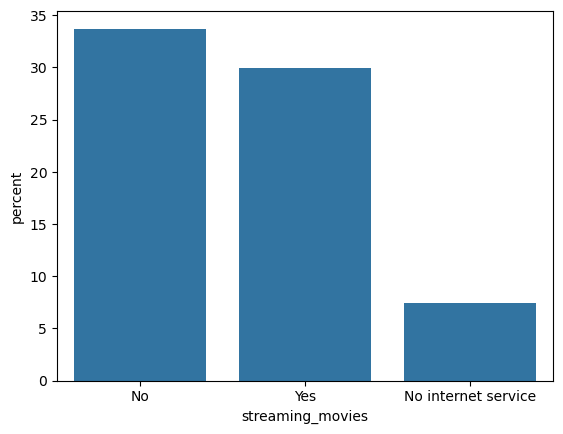


Churn Rate by contract:
         contract churn    percent
1  Month-to-month   Yes  42.709677
3        One year   Yes  11.277174
5        Two year   Yes   2.848665


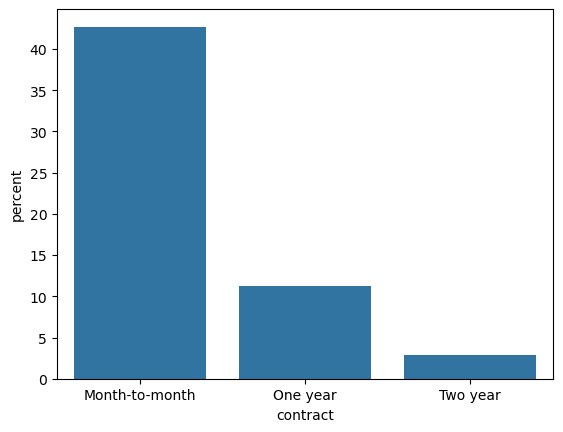


Churn Rate by paperless_billing:
  paperless_billing churn    percent
3               Yes   Yes  33.589251
1                No   Yes  16.375698


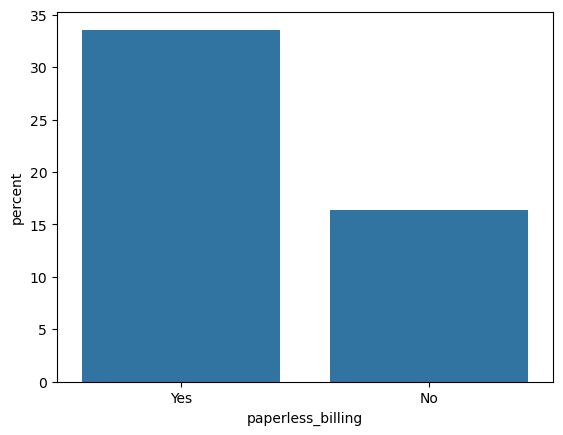


Churn Rate by payment_method:
              payment_method churn    percent
5           Electronic check   Yes  45.285412
7               Mailed check   Yes  19.201995
1  Bank transfer (automatic)   Yes  16.731518
3    Credit card (automatic)   Yes  15.253123


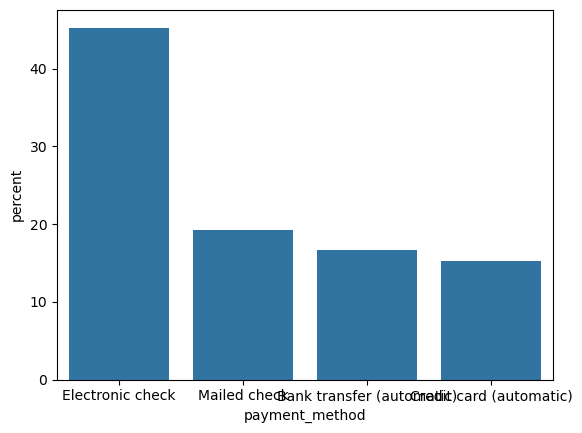

In [34]:
#checking the feature-churn relationship of categorical columns by calculating the churn rates
cat_col = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 
           'online_security', 'online_backup', 'device_protection','tech_support','streaming_tv', 'streaming_movies', 'contract', 
           'paperless_billing', 'payment_method']
for col in cat_col:
    churn_rate = df.groupby(col)['churn'].value_counts(normalize=True).mul(100).rename('percent').reset_index() 
    
    # Filter for 'Yes' churn
    churn_rate_yes = churn_rate[churn_rate['churn'] == 'Yes'] 
    print(f"\nChurn Rate by {col}:\n{churn_rate_yes.sort_values(by='percent', ascending=False)}")
    sns.barplot(x=col, y='percent', data=churn_rate_yes, order=churn_rate_yes.sort_values('percent', ascending=False)[col])
    plt.show()

In [35]:
#feature engineering
#Deriving the number of operational service feature
ops_list = ['online_security', 'online_backup', 'device_protection', 'tech_support']
df['num_optional_services'] = df[ops_list].apply(lambda row: sum(row == 'Yes'), axis=1)


Churn Rate by num_optional_services:
   num_optional_services churn    percent
3                      1   Yes  38.854806
1                      0   Yes  29.817008
5                      2   Yes  23.760933
7                      3   Yes  12.486660
9                      4   Yes   5.330490


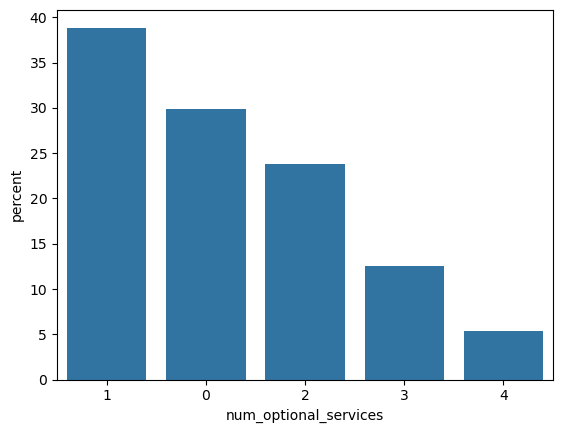

In [38]:
#checking the feature-churn relationship of num_optional_services by calculating the churn rates

churn_rate = df.groupby('num_optional_services')['churn'].value_counts(normalize=True).mul(100).rename('percent').reset_index() 
    
# Filter for 'Yes' churn
churn_rate_yes = churn_rate[churn_rate['churn'] == 'Yes'] 
print(f"\nChurn Rate by {'num_optional_services'}:\n{churn_rate_yes.sort_values(by='percent', ascending=False)}")
sns.barplot(x='num_optional_services', y='percent', data=churn_rate_yes, order=churn_rate_yes.sort_values('percent', ascending=False)['num_optional_services'])
plt.show()

In [40]:
 
#converting churn variable to binary
df['churn_encode'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

#encoding every other categorical variable
cat_col_encode = ['gender','online_security', 'online_backup',	'device_protection', 'tech_support', 'senior_citizen', 'partner', 'dependents', 
                  'phone_service', 'multiple_lines', 'internet_service', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method']
df_encode = pd.get_dummies(df, columns=cat_col_encode, drop_first = True, dtype=int)


In [42]:
# Verifying the encoded categorical column
df_encode

,tenure,monthly_charges,total_charges,churn,num_optional_services,churn_encode,gender_Male,online_security_No internet service,online_security_Yes,online_backup_No internet service,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,1,29.850000,29.850000,No,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.950001,1889.500000,No,2,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.849998,108.150002,Yes,2,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.299999,1840.750000,No,3,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.699997,151.649994,Yes,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.800003,1990.500000,No,3,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,72,103.199997,7362.899902,No,2,0,0,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,11,29.600000,346.450012,No,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,4,74.400002,306.600006,Yes,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [44]:
#drop the customer_id, churn, gender, and has_streaming colomn as it is irrelevant to the modelling
df_encode = df_encode.drop(columns=['churn'])

In [46]:
#confirming the selected feature data type
df_encode.dtypes

tenure                                      int64
monthly_charges                           float64
total_charges                             float64
num_optional_services                       int64
churn_encode                                int64
gender_Male                                 int32
online_security_No internet service         int32
online_security_Yes                         int32
online_backup_No internet service           int32
online_backup_Yes                           int32
device_protection_No internet service       int32
device_protection_Yes                       int32
tech_support_No internet service            int32
tech_support_Yes                            int32
senior_citizen_True                         int32
partner_Yes                                 int32
dependents_Yes                              int32
phone_service_Yes                           int32
multiple_lines_No phone service             int32
multiple_lines_Yes                          int32


In [48]:
#isolating the outcome variable and the feature to use in the model
y = df_encode['churn_encode']
X = df_encode.drop('churn_encode', axis=1)

#display the first few rows of both the outcome variable and the feature to be used in the model
print(y.head())
print(X.head())

0    0
1    0
2    1
3    0
4    1
Name: churn_encode, dtype: int64
   tenure  monthly_charges  total_charges  num_optional_services  gender_Male  \
0       1        29.850000      29.850000                      1            0   
1      34        56.950001    1889.500000                      2            1   
2       2        53.849998     108.150002                      2            1   
3      45        42.299999    1840.750000                      3            1   
4       2        70.699997     151.649994                      0            0   

   online_security_No internet service  online_security_Yes  \
0                                    0                    0   
1                                    0                    1   
2                                    0                    1   
3                                    0                    1   
4                                    0                    0   

   online_backup_No internet service  online_backup_Yes  \
0      

In [50]:
#seperate into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [52]:
#intantiate model
dt_model = DecisionTreeClassifier(random_state=123)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[ 3, 5, 8],
             'min_samples_leaf': [3, 5, 8 ],
             'min_samples_split': [2, 3, 4],
             'class_weight': ['balanced']}

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
dt_cv = GridSearchCV(dt_model, cv_params, scoring=scoring, cv=5, refit='roc_auc')




In [54]:
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'class_weight': ['balanced'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [3, 5, 8],
                         'min_samples_split': [2, 3, 4]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [55]:
#checking the best parameter
dt_cv.best_params_

{'class_weight': 'balanced',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [56]:
#checking best AUC score on CV
dt_cv.best_score_

0.8342015758743836

In [60]:
#predicting on test data
dt_pred = dt_cv.predict(X_test)

In [62]:
#evaluating predicted data
print("Decision Tree")
print("Classification Report:\n",classification_report(y_test, dt_pred))
print("AUC Score:",roc_auc_score(y_test, dt_pred))

Decision Tree
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.71      0.79      1033
           1       0.49      0.76      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407

AUC Score: 0.7390809179431694


In [64]:
#instantiate the model
rf_model = RandomForestClassifier(random_state=123)


# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [2, 4, 6, None], 'max_features':[ 0.5, 0.7, 'sqrt' ], 'max_samples':[0.5, 0.7, None ],
             'min_samples_leaf': [ 2, 4, 6],
             'min_samples_split': [2, 5,10],
             'n_estimators': [10, 40, 50, 100,], 'class_weight': ['balanced']
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf = GridSearchCV(estimator=rf_model, param_grid=cv_params, scoring=scoring, cv=5, n_jobs=-1, refit='roc_auc')




In [66]:
%%time
rf.fit(X_train, y_train)

CPU times: total: 1min 51s
Wall time: 1h 15min 33s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [2, 4, 6, None],
                         'max_features': [0.5, 0.7, 'sqrt'],
                         'max_samples': [0.5, 0.7, None],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 40, 50, 100]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [67]:
#checking for the best parameters
rf.best_params_

{'class_weight': 'balanced',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

In [68]:
#checking for the best score
rf.best_score_

0.8505008624389612

In [69]:
#predicting on the test data
rf_pred = rf.predict(X_test)

In [70]:
#evaluating the model on predicted data
print("Random Forest")
print("Classification Report:\n",classification_report(y_test, rf_pred))
print("AUC Score:",roc_auc_score(y_test, rf_pred))

Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1033
           1       0.56      0.72      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407

AUC Score: 0.7582336375542913


In [76]:
#scaling based on imbalanced class
scale_pos_weight_value = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Calculated scale_pos_weight: {scale_pos_weight_value}")

Calculated scale_pos_weight: 2.762541806020067


In [78]:
#instantiate the model
xgb_model = XGBClassifier(objective='binary:logistic',
    scale_pos_weight=scale_pos_weight_value, random_state=123) 

cv_params = {'max_depth': [3,5,6], 'min_child_weight': [2, 4, 6], 
             'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [ 100, 200, 300]}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

xgb_cv = GridSearchCV(xgb_model, cv_params, scoring=scoring, cv=5, refit='roc_auc')


In [80]:
# fitting the model
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 6], 'min_child_weight': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [92]:
path = 'C:/Users/PC/Documents'

In [94]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path: path of folder to save the pickle
        model_object: a model you want to pickle
        save_as: filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [96]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path: path to folder to read from
        saved_model_name: filename of pickled model to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [98]:
# Write pickle
write_pickle(path, xgb_cv, 'churn_xgb')

In [100]:
# Read pickle
xgb_cv = read_pickle(path, 'churn_xgb')

In [81]:
# Get the best parameters
xgb_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 6,
 'n_estimators': 100}

In [82]:
#checking for the best auc score
xgb_cv.best_score_

0.8514471158907415

In [83]:
xgb_pred = xgb_cv.predict(X_test)

In [84]:
print("XGB")
print("Classification Report:\n",classification_report(y_test, xgb_pred))
print("AUC Score:",roc_auc_score(y_test, xgb_pred))

XGB
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407

AUC Score: 0.7669940104881167


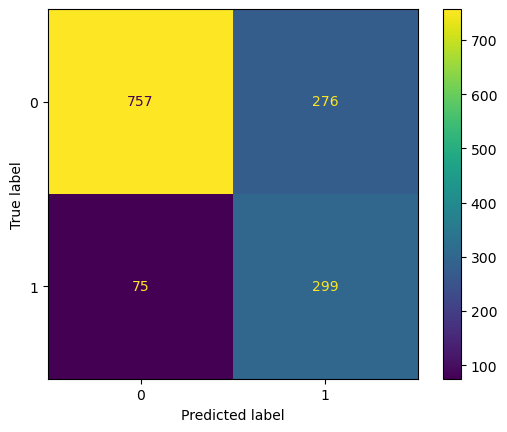

In [77]:
#generating array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_pred, labels=xgb_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_cv.classes_)
  
disp.plot()
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

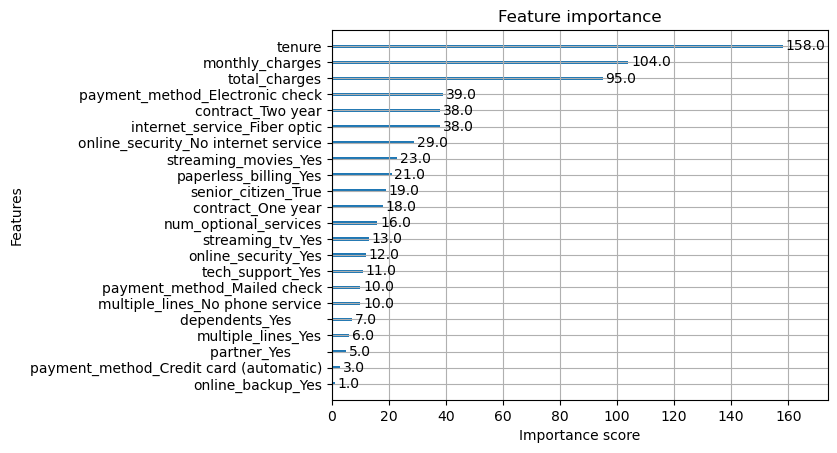

In [83]:
#getting feature importance
plot_importance(xgb_cv.best_estimator_)